In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df_1 = pd.read_csv('Resort_1.csv', thousands=',')

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 567 non-null    object 
 1   Day of week          567 non-null    object 
 2   is_school_out        567 non-null    int64  
 3   is_holiday           567 non-null    int64  
 4   Day Tickets          567 non-null    int64  
 5   Night Ticket         534 non-null    float64
 6   Total Ticket         567 non-null    int64  
 7   SP Day               428 non-null    float64
 8   SP Night             403 non-null    float64
 9   Total SP             567 non-null    float64
 10  Total VIsits Alpine  567 non-null    float64
 11  T - AWND             567 non-null    float64
 12  T - PRCP             567 non-null    float64
 13  T - SNOW             567 non-null    float64
 14  T - SNWD             567 non-null    float64
 15  T - TAVG             567 non-null    int

In [58]:
#Date dealings - make the 'Date' column a datetime object, create day of week and month category to do some EDA and use as variables
#make the 'Date' Column a datetime type
df_1['Date'] = pd.to_datetime(df_1['Date'])

#The day_of_week_num column created with Monday=0, Sunday=6. Weekends = 5 & 6, Friday = 4
df_1['day_of_week_num'] = df_1['Date'].dt.dayofweek

#creating Month Column
df_1['month'] = df_1['Date'].dt.month

#no need for day of week column in a string anymore
df_1.drop(['Day of week'], axis=1, inplace = True)

df_1['month'].value_counts()

3     124
1     124
12    119
2     113
4      50
11     37
Name: month, dtype: int64

In [59]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             567 non-null    datetime64[ns]
 1   is_school_out    567 non-null    int64         
 2   is_holiday       567 non-null    int64         
 3   Day Tickets      567 non-null    int64         
 4   Night Ticket     534 non-null    float64       
 5   Total Ticket     567 non-null    int64         
 6   SP Day           428 non-null    float64       
 7   SP Night         403 non-null    float64       
 8   Total SP         567 non-null    float64       
 9   TOTAL_VISITS     567 non-null    float64       
 10  T - AWND         567 non-null    float64       
 11  T - PRCP         567 non-null    float64       
 12  T - SNOW         567 non-null    float64       
 13  T - SNWD         567 non-null    float64       
 14  T - TAVG         567 non-null    int64    

In [60]:
df_1.rename(columns = {'Total VIsits Alpine':'TOTAL_VISITS'}, inplace = True)

In [61]:
df_1.isnull().sum()

Date                 0
is_school_out        0
is_holiday           0
Day Tickets          0
Night Ticket        33
Total Ticket         0
SP Day             139
SP Night           164
Total SP             0
TOTAL_VISITS         0
T - AWND             0
T - PRCP             0
T - SNOW             0
T - SNWD             0
T - TAVG             0
T - TMAX             0
T - TMIN             0
T - WSF2             0
T - WSF5             0
M_PRCP               0
M_SNWD               0
M_TAVG               0
M_TMAX               0
M_TMIN               0
M_TOBS               0
M_WESD               0
day_of_week_num      0
month                0
dtype: int64

# Correlation Matrix 
Let's start exploring correlation, taking out `TOTAL_VISITS` (our target), SP, Day and Night related ticket totals to see if any of our variables are highly correlated. Also taking out `Date` as the specific date is not a predictor. 


In [62]:
#removing columns for correlation testing

df_1_corr = df_1.drop(columns=['Date', 'TOTAL_VISITS'])
df_1_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_school_out    567 non-null    int64  
 1   is_holiday       567 non-null    int64  
 2   Day Tickets      567 non-null    int64  
 3   Night Ticket     534 non-null    float64
 4   Total Ticket     567 non-null    int64  
 5   SP Day           428 non-null    float64
 6   SP Night         403 non-null    float64
 7   Total SP         567 non-null    float64
 8   T - AWND         567 non-null    float64
 9   T - PRCP         567 non-null    float64
 10  T - SNOW         567 non-null    float64
 11  T - SNWD         567 non-null    float64
 12  T - TAVG         567 non-null    int64  
 13  T - TMAX         567 non-null    int64  
 14  T - TMIN         567 non-null    int64  
 15  T - WSF2         567 non-null    float64
 16  T - WSF5         567 non-null    float64
 17  M_PRCP          

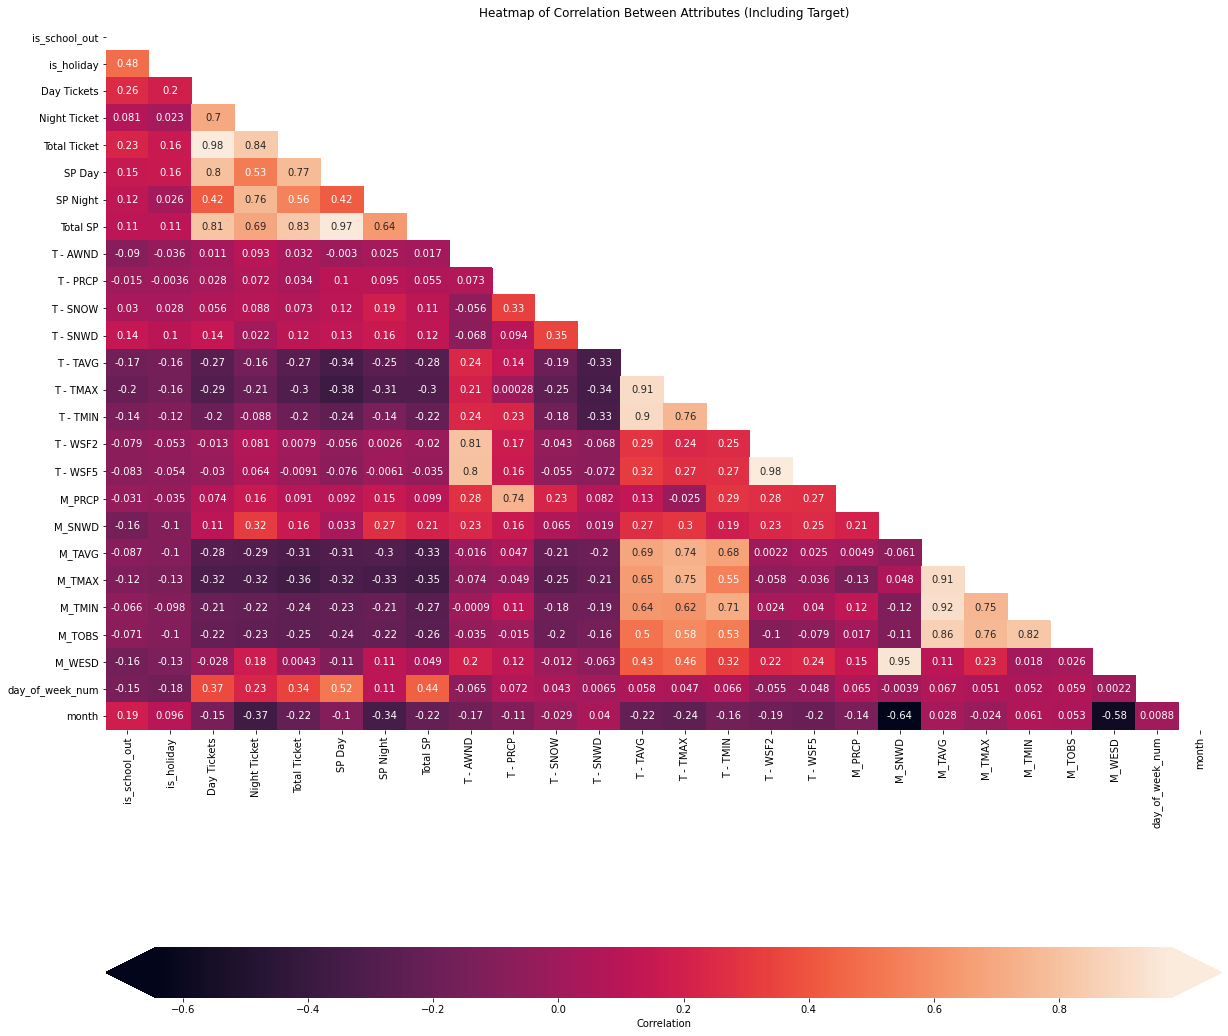

In [63]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = df_1_corr
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax, annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

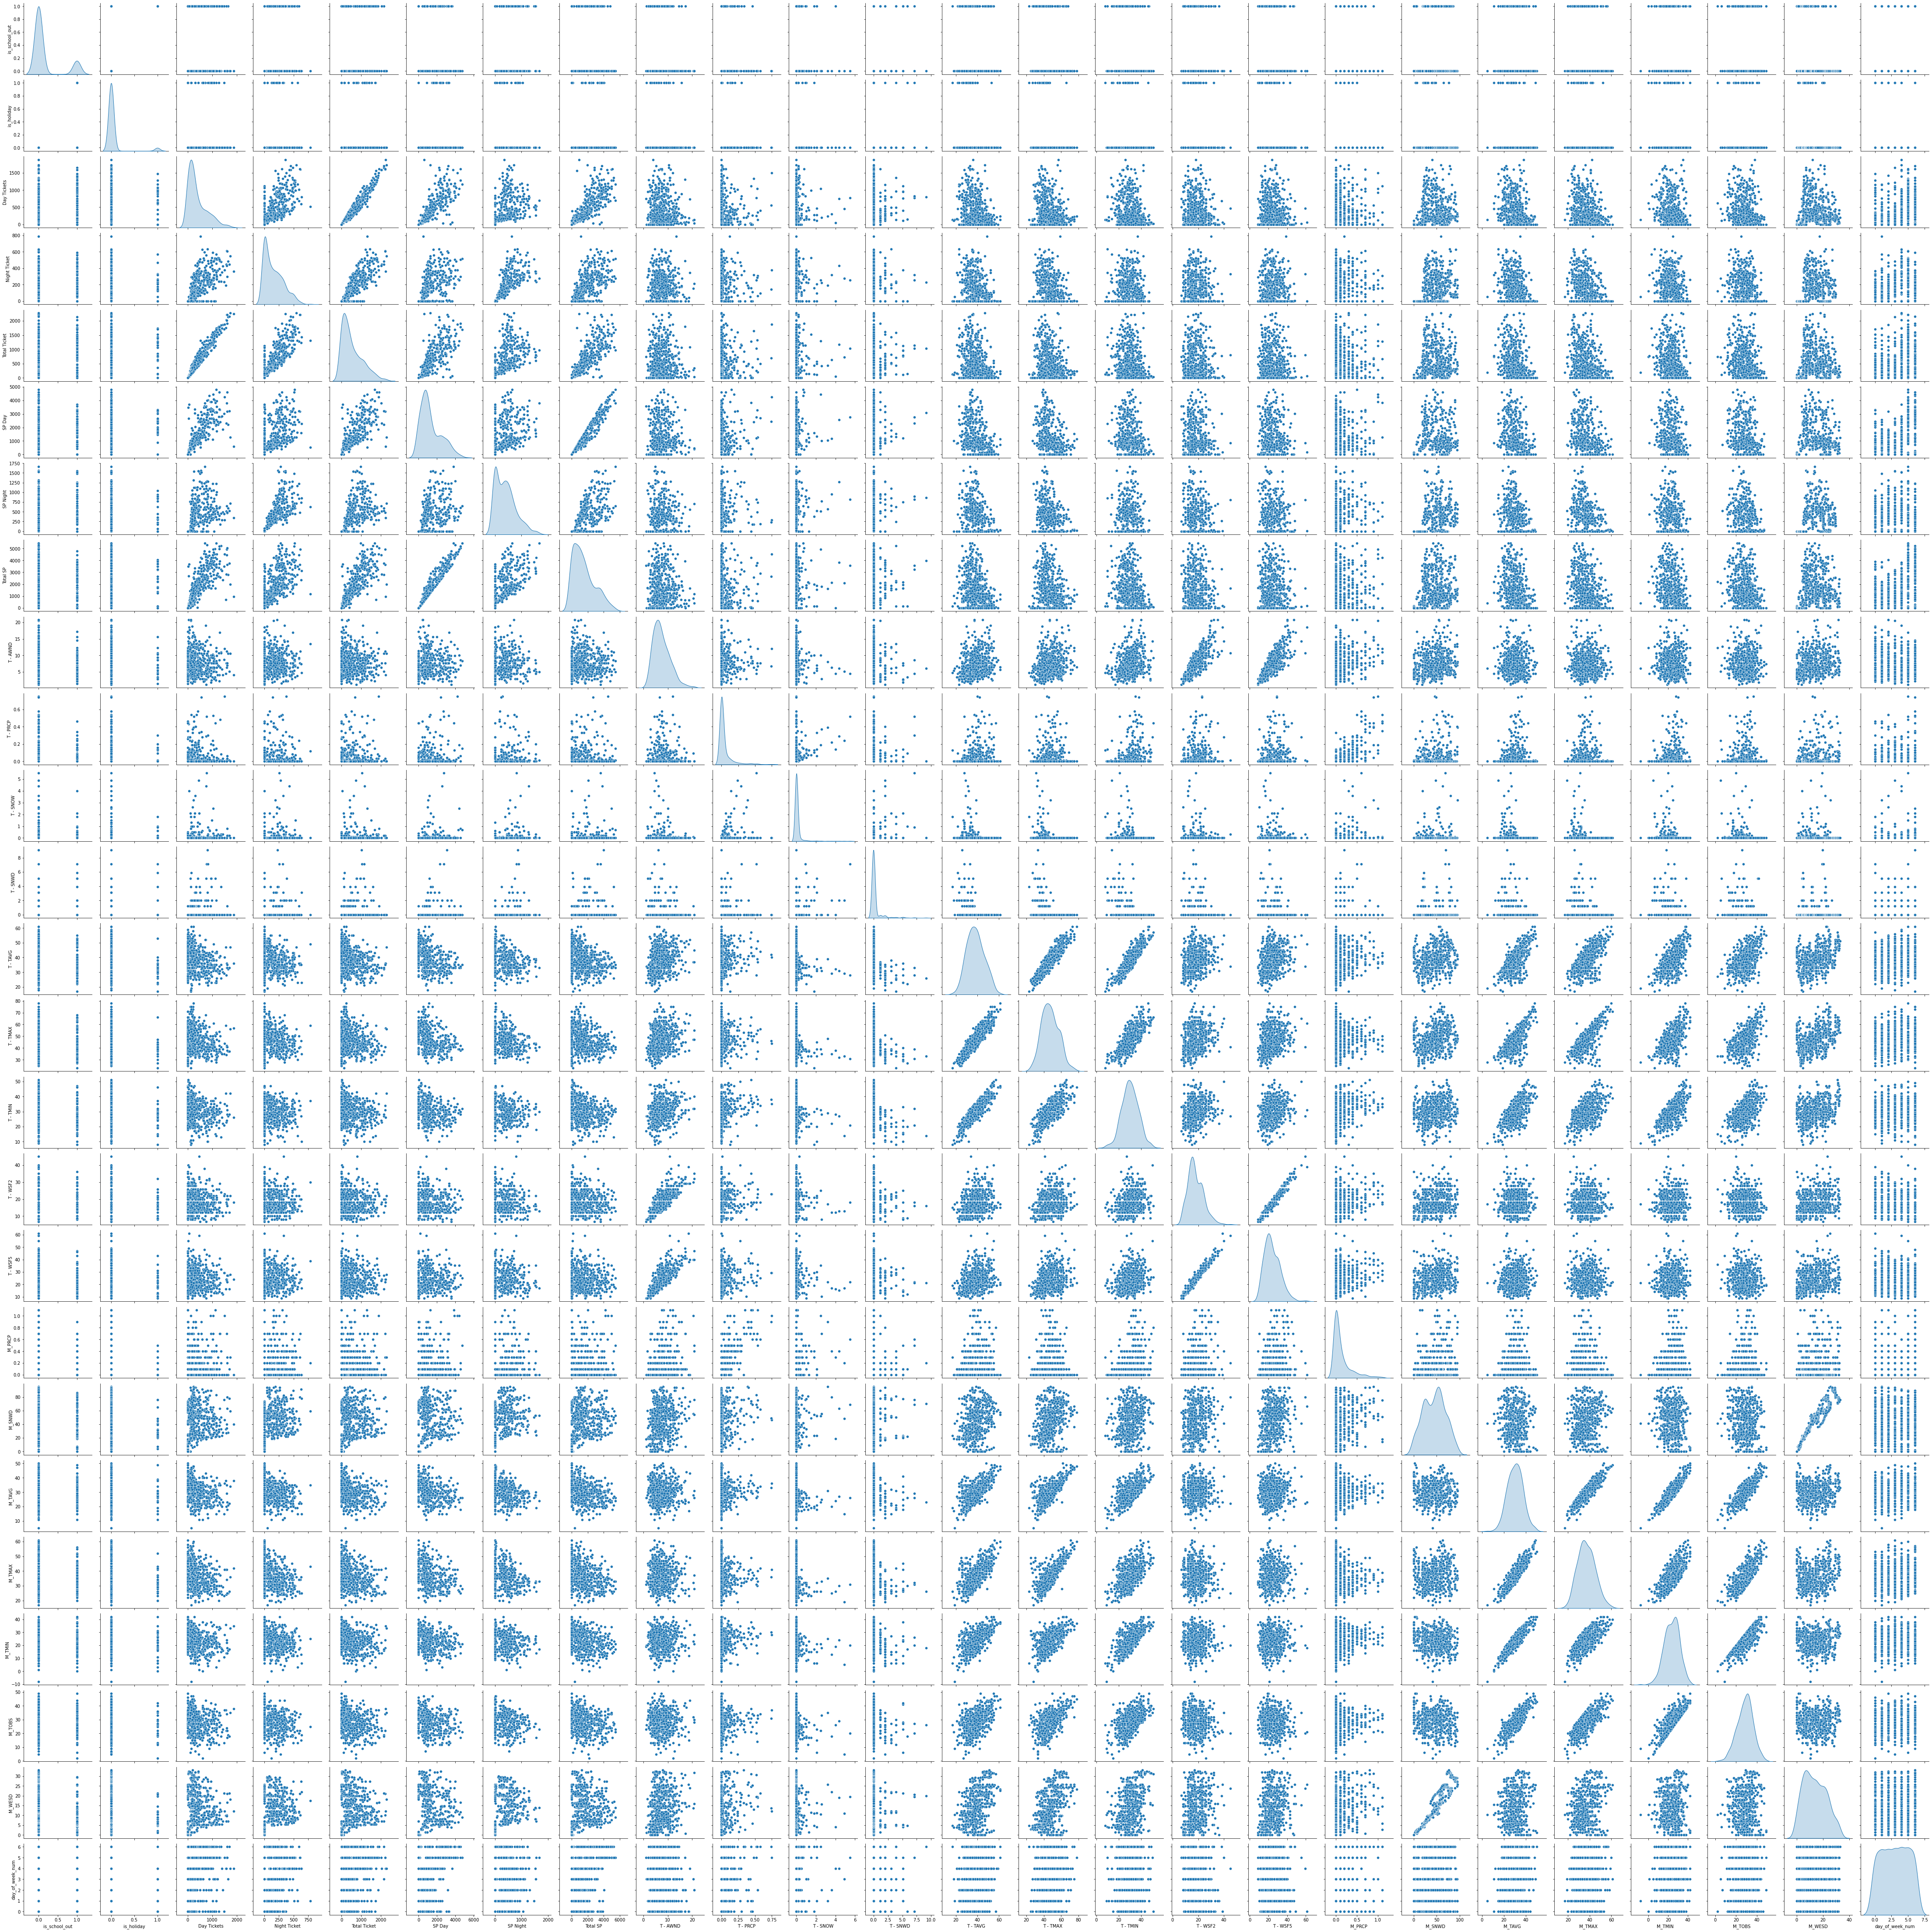

In [49]:
#maybe do a pairplot? 
sns.pairplot(data=df_1_corr, diag_kind='kde')


In [64]:
#identifying the highest correlated variables

df = df_1_corr.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]


cc
pairs                                 
(T - WSF5, T - WSF2)          0.978815
(Day Tickets, Total Ticket)   0.975263
(SP Day, Total SP)            0.967140
(M_WESD, M_SNWD)              0.953119
(M_TMIN, M_TAVG)              0.924962
(M_TMAX, M_TAVG)              0.912155
(T - TAVG, T - TMAX)          0.911270
(T - TMIN, T - TAVG)          0.902078
(M_TOBS, M_TAVG)              0.861747
(Night Ticket, Total Ticket)  0.838882
(Total SP, Total Ticket)      0.831425
(M_TMIN, M_TOBS)              0.822772
(Total SP, Day Tickets)       0.812933
(T - WSF2, T - AWND)          0.806453
(T - WSF5, T - AWND)          0.799083
(SP Day, Day Tickets)         0.797968
(Total Ticket, SP Day)        0.769974
(M_TMAX, M_TOBS)              0.763902
(SP Night, Night Ticket)      0.758170
(T - TMIN, T - TMAX)          0.756478
(M_TMAX, M_TMIN)              0.753173

### Multicollinairity decision

Based on the information above it makes sense to drop some data, especially the weather data: 

**Weather:** 

- `T_WSF5` (fastest 5 min wind speed in the metropolotan(town) area)
- `M_WESD` (water equivalent snow on the ground on the mountain)
- `M_TMIN` + `T_TMIN` (temperature min on the mountain and in town)
- `M_TMAX` + `T_TMAX` (temperature max on the mountain and in town)
- `T_TOBS` + `M_TOBS` (temperature at time of observation on mtn and in town)
- `T_WSF2` (fastest 2 min wind speend, keeping the average wind speed for town)

**Ticketing:**

To keep things simple I think for now I am going to remove the ticketing and visit informatoin that breaks down season pass vs ticket and night vs day ticketing. I may want to use these as a prediction if there's time or the business need becomes obvious. Unfortunately I don't have pre-sale data to work with. 

- `SP Night`
- `SP Day`
- `Day Tickets`
- `Night Ticket`
- `Total Tickets`
- `Total SP`

In [65]:
df_1_preprocessed = df_1.drop(columns=['T - WSF5', 'M_WESD', 'M_TMIN', 'T - TMIN', 'M_TMAX', 'T - TMAX', 'M_TOBS', 'T - WSF2', 'SP Night', 'SP Day', 'Day Tickets', 'Night Ticket', 'Total Ticket', 'Total SP'])
df_1_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             567 non-null    datetime64[ns]
 1   is_school_out    567 non-null    int64         
 2   is_holiday       567 non-null    int64         
 3   TOTAL_VISITS     567 non-null    float64       
 4   T - AWND         567 non-null    float64       
 5   T - PRCP         567 non-null    float64       
 6   T - SNOW         567 non-null    float64       
 7   T - SNWD         567 non-null    float64       
 8   T - TAVG         567 non-null    int64         
 9   M_PRCP           567 non-null    float64       
 10  M_SNWD           567 non-null    int64         
 11  M_TAVG           567 non-null    int64         
 12  day_of_week_num  567 non-null    int64         
 13  month            567 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(7)

# 0 visit days
Taking a look at rows with 0 visits (these are the days the resort is closed)

In [66]:
df_1_preprocessed[df_1_preprocessed.TOTAL_VISITS == 0]

Date  is_school_out  is_holiday  TOTAL_VISITS  T - AWND  T - PRCP  \
0   2017-11-21              1           0           0.0      7.61      0.05   
1   2017-11-22              1           0           0.0      4.47      0.01   
2   2017-11-23              1           1           0.0      7.16      0.01   
3   2017-11-24              1           0           0.0      6.49      0.26   
4   2017-11-25              0           0           0.0      7.38      0.00   
..         ...            ...         ...           ...       ...       ...   
560 2021-04-12              0           0           0.0      3.80      0.00   
561 2021-04-13              0           0           0.0      6.71      0.00   
562 2021-04-14              0           0           0.0      6.93      0.00   
563 2021-04-15              0           0           0.0      8.28      0.00   
564 2021-04-16              0           0           0.0      6.49      0.00   

     T - SNOW  T - SNWD  T - TAVG  M_PRCP  M_SNWD  M_TAVG  day_of_week_num  \
0         0.0       0.0        49     0.2       7      43                1   
1         0.0       0.0        55     0.1       6      47                2   
2         0.0       0.0        53     0.1       4      49                3   
3         0.0       0.0        53     0.1       4      35                4   
4         0.0       0.0        43     0.2       3      41                5   
..        ...       ...       ...     ...     ...     ...              ...   
560       0.0       0.0        41     0.0      45      32                0   
561       0.0       0.0        47     0.0      43      36                1   
562       0.0       0.0        48     0.0      42      35                2   
563       0.0       0.0        50     0.0      41      38                3   
564       0.0       0.0        53     0.0      40      38                4   

     month  
0       11  
1       11  
2       11  
3       11  
4       11  
..     ...  
560      4  
561      4  
562      4  
563      4  
564      4  

[83 rows x 14 columns]

In [67]:
#dropping the 0 visit days: 
df_1_preprocessed = df_1_preprocessed[df_1_preprocessed.TOTAL_VISITS != 0]
df_1_preprocessed['TOTAL_VISITS'].value_counts()

2203.0    3
978.0     3
715.0     2
1355.0    2
879.0     2
         ..
883.0     1
7144.0    1
5748.0    1
895.0     1
432.0     1
Name: TOTAL_VISITS, Length: 464, dtype: int64

In [68]:
df_1_preprocessed.describe()

is_school_out  is_holiday  TOTAL_VISITS    T - AWND    T - PRCP  \
count     484.000000  484.000000    484.000000  484.000000  484.000000   
mean        0.167355    0.047521   2421.783058    7.675909    0.046818   
std         0.373679    0.212970   1709.932584    3.549261    0.109007   
min         0.000000    0.000000     48.000000    1.120000    0.000000   
25%         0.000000    0.000000   1037.500000    4.920000    0.000000   
50%         0.000000    0.000000   2015.500000    6.930000    0.000000   
75%         0.000000    0.000000   3503.500000    9.675000    0.030000   
max         1.000000    1.000000   7144.000000   20.800000    0.750000   

         T - SNOW    T - SNWD    T - TAVG      M_PRCP      M_SNWD      M_TAVG  \
count  484.000000  484.000000  484.000000  484.000000  484.000000  484.000000   
mean     0.133058    0.317355   38.026860    0.143595   47.859504   29.735537   
std      0.565998    1.066344    7.917621    0.224347   21.434500    6.996324   
min      0.000000    0.000000   17.000000    0.000000    0.000000    5.000000   
25%      0.000000    0.000000   32.000000    0.000000   29.750000   25.000000   
50%      0.000000    0.000000   38.000000    0.000000   49.000000   30.000000   
75%      0.000000    0.000000   43.000000    0.200000   62.000000   35.000000   
max      5.500000    9.100000   61.000000    1.100000   95.000000   48.000000   

       day_of_week_num       month  
count       484.000000  484.000000  
mean          3.117769    4.287190  
std           2.009443    4.118101  
min           0.000000    1.000000  
25%           1.000000    2.000000  
50%           3.000000    3.000000  
75%           5.000000    4.000000  
max           6.000000   12.000000

## Indexing with Date/Time

In [69]:
#df_1_preprocessed.reset_index(inplace=True)
df_1_preprocessed.set_index('Date', inplace=True)
df_1_preprocessed.head()


is_school_out  is_holiday  TOTAL_VISITS  T - AWND  T - PRCP  \
Date                                                                      
2017-12-21              0           0         432.0     10.07      0.00   
2017-12-22              1           0          48.0      4.47      0.14   
2017-12-23              1           0         266.0      6.93      0.14   
2017-12-24              1           1         283.0      4.70      0.13   
2017-12-25              1           1         281.0      3.36      0.09   

            T - SNOW  T - SNWD  T - TAVG  M_PRCP  M_SNWD  M_TAVG  \
Date                                                               
2017-12-21       0.0       0.0        29     0.0      15      21   
2017-12-22       4.0       0.0        32     0.3      19      24   
2017-12-23       2.1       5.1        32     0.0      23      18   
2017-12-24       1.8       3.9        17     0.3      23      19   
2017-12-25       1.0       5.9        22     0.1      22      26   

            day_of_week_num  month  
Date                                
2017-12-21                3     12  
2017-12-22                4     12  
2017-12-23                5     12  
2017-12-24                6     12  
2017-12-25                0     12

## Some Visuals

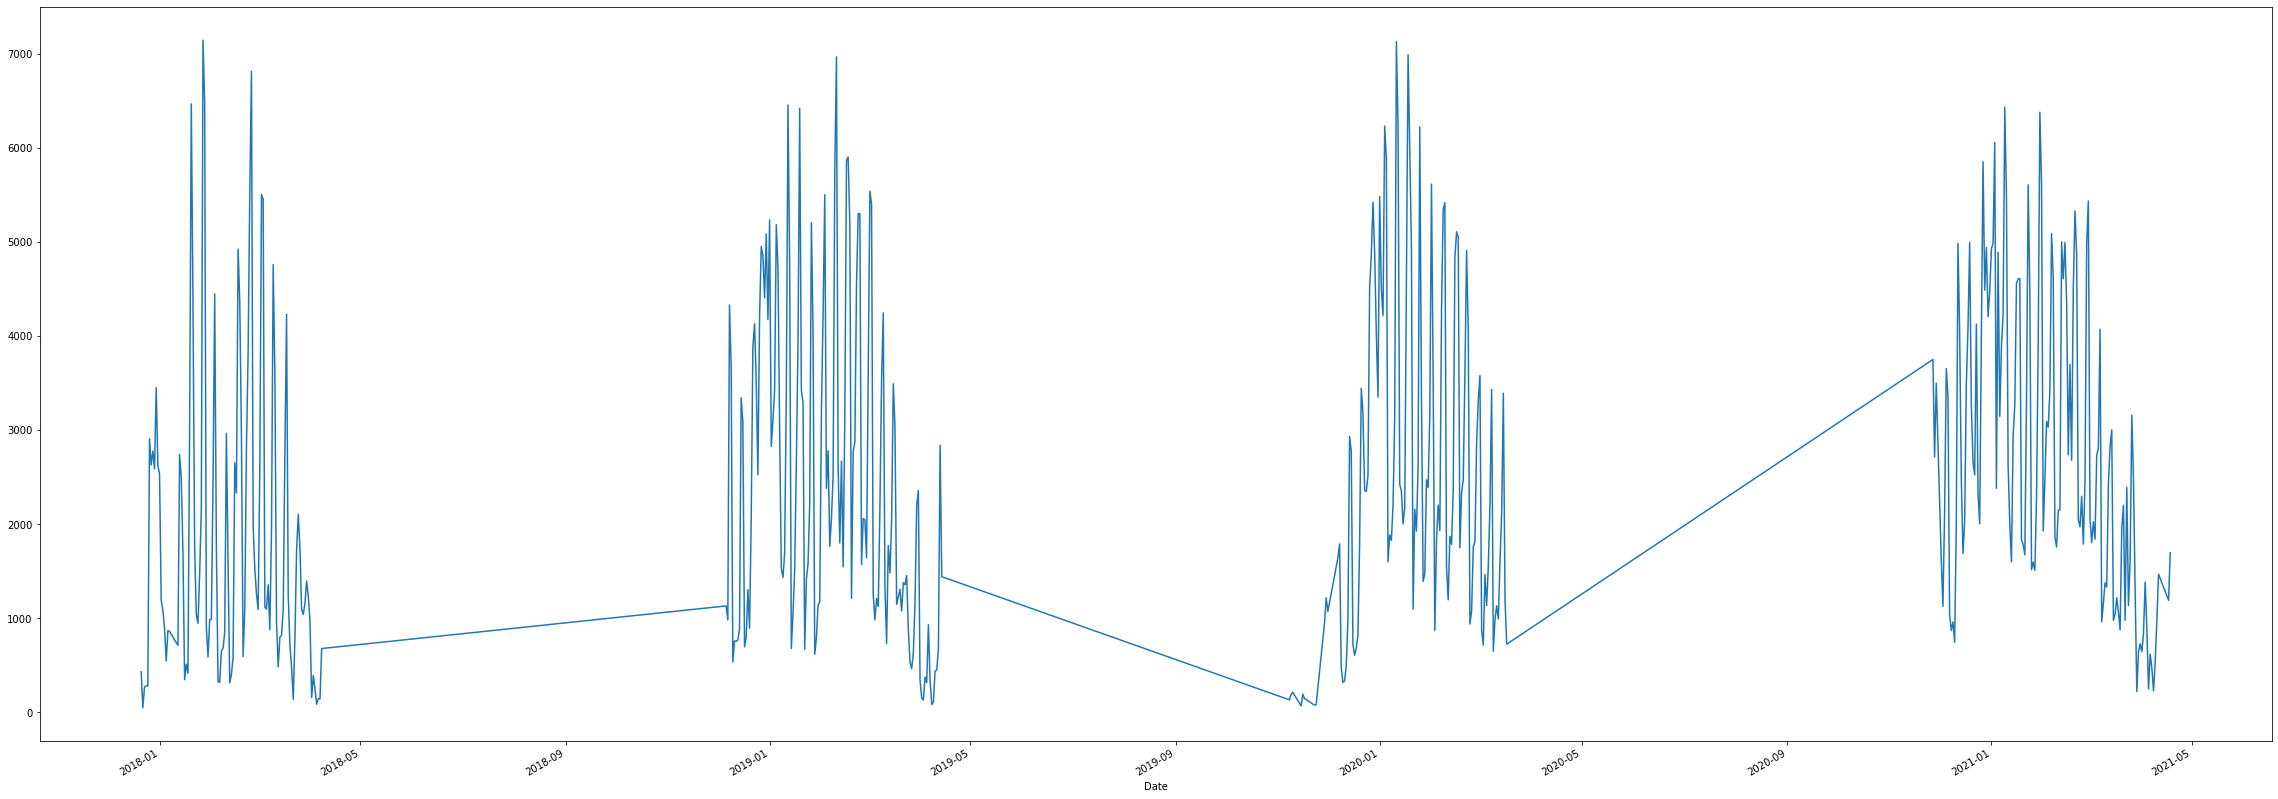

In [70]:
df_1_preprocessed['TOTAL_VISITS'].plot(figsize = (40, 15));

month
1     2482.5
2     2602.0
3     1221.5
4      247.5
11       0.0
12    1687.0
Name: TOTAL_VISITS, dtype: float64


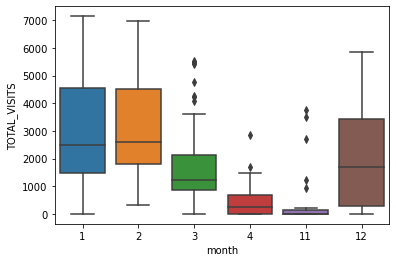

In [116]:
box_plot = sns.boxplot(x='month', y='TOTAL_VISITS', data=df_1)

medians = df_1.groupby(['month'])['TOTAL_VISITS'].median()
print(medians)

# vertical_offset = df_1['TOTAL_VISITS'].median() * 0.05 # offset from median for display

# for xtick in box_plot.get_xticks():
#     box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], horizontalalignment='center',size='x-small',color='w',weight='semibold')

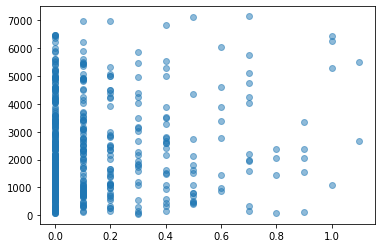

In [112]:
fig, ax = plt.subplots()

ax.scatter(df_1_preprocessed['M_PRCP'], df_1_preprocessed["TOTAL_VISITS"], alpha=0.5)

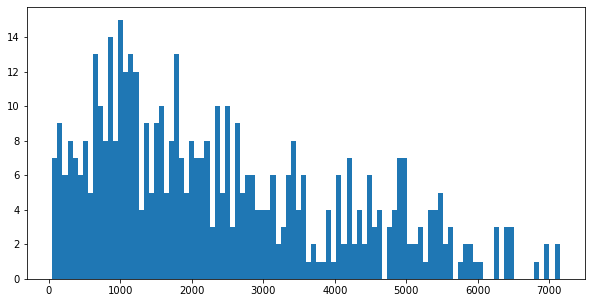

In [113]:
#visualization of target - Visits
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_1_preprocessed['TOTAL_VISITS'], bins=100);

# First Simple Model
Linear Regression

In [17]:
#Split into test and train X and Y
X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
y.head()

Date
2017-12-21    432.0
2017-12-22     48.0
2017-12-23    266.0
2017-12-24    283.0
2017-12-25    281.0
Name: TOTAL_VISITS, dtype: float64

In [21]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [22]:
# Print R-Squared and RMSE

from sklearn.metrics import mean_squared_error

# Generate predictions using baseline_model and X_train
y_pred_baseline = linreg.predict(X_train)
print('Training R-Squared:', linreg.score(X_train, y_train))
print('Test R-Squared:', linreg.score(X_test, y_test))
baseline_rmse = mean_squared_error(y_train, y_pred_baseline, squared=False)
baseline_rmse

Training R-Squared: 0.427501354658681
Test R-Squared: 0.5330946045641549


1281.0844997485394

In [23]:
# # Get the cross validated scores for our baseline model
# baseline_cv = cross_val_score(linreg, X_train, y_train, scoring="neg_root_mean_squared_error")

# # Display the average of the cross-validated scores
# baseline_cv_rmse = -(baseline_cv.mean())
# baseline_cv_rmse

# model with OHE and Standard Scaler in a pipeline

In [24]:
#Split into test and train X and Y
X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#column transformer - this sets up simmilar to pipeline (scaler and transformer)

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	('scaler', StandardScaler(), non_cat),
	], remainder ='passthrough')


LinRegPipe = Pipeline([('trans', Transformer),
                ('linreg', LinearRegression())])

LinRegPipe.fit(X_train, y_train)


# Generate predictions using baseline_model and X_train
y_pred_LinRegPipe = LinRegPipe.predict(X_train)
y_pred_linRegPipeTest = LinRegPipe.predict(X_test)
print('Training R-Squared:', LinRegPipe.score(X_train, y_train))
print('Test R-Squared:', LinRegPipe.score(X_test, y_test))
LinRegPipe_rmse = mean_squared_error(y_train, y_pred_baseline, squared=False)
LinRegPipe_rmse

Training R-Squared: 0.503689555412228
Test R-Squared: 0.5874412886196437


1281.0844997485394

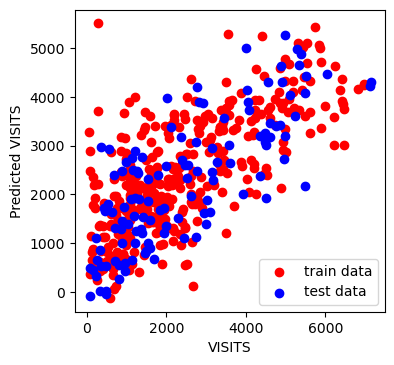

In [25]:
plt.figure(figsize=(4, 4), dpi=100)
plt.xlabel("VISITS")
plt.ylabel("Predicted VISITS")
# plt.xlim(0, 60)
# plt.ylim(0, 60)
plt.scatter(y_train, y_pred_LinRegPipe, lw=1, color="r", label="train data")
plt.scatter(y_test, y_pred_linRegPipeTest, lw=1, color="b", label="test data")
plt.legend()
plt.show()

## Tree Regressor

In [26]:
#Split into test and train X and Y
X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#column transformer - this sets up simmilar to pipeline (scaler and transformer)

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')


TreeRegPipe = Pipeline([('trans', Transformer),
                        ('treereg', DecisionTreeRegressor())])

TreeRegPipe.fit(X_train, y_train)

y_pred_tree = TreeRegPipe.predict(X_train)
print('Training R-Squared:', TreeRegPipe.score(X_train, y_train))
print('Test R-Squared:', TreeRegPipe.score(X_test, y_test))
TreeRegPipe_rmse = mean_squared_error(y_train, y_pred_tree, squared=False)
TreeRegPipe_rmse





Training R-Squared: 1.0
Test R-Squared: 0.44757496020191523


0.0

# ##Decision tree is probably overfitting up there, let's do a grid search: 

In [27]:
#pipeline_2:

X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pipeline first step: Transformer

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')

#Pipeline second Step: treeregressor
dt_clf2 = DecisionTreeRegressor(random_state = 42)

#pipeline
pipeline_2 = Pipeline([('transformer', Transformer),
						('dtr', dt_clf2)])

#set up grid search paramater grid
dt_param_grid = {
    'dtr__min_samples_split': [2, 4, 6, 8],
    'dtr__max_depth': [None, 2, 3, 4, 5, 6]
}

#set up gridsearch:
gridsearch = GridSearchCV(estimator=pipeline_2,
						  param_grid=dt_param_grid,
						  cv=5)


#fit gridsearch
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

gridsearch_opt_tree = gridsearch.predict(X_train)
print('Training R-Squared:', gridsearch.score(X_train, y_train))
print('Test R-Squared:', gridsearch.score(X_test, y_test))
print("Best Parameter Combination Found During Grid Search:")
print(gridsearch.best_params_)
opt_tree_rmse = mean_squared_error(y_train, gridsearch_opt_tree, squared=False)
opt_tree_rmse

Training R-Squared: 0.8120437873609782
Test R-Squared: 0.5707905507573686
Best Parameter Combination Found During Grid Search:
{'dtr__max_depth': 6, 'dtr__min_samples_split': 6}


734.0385818888367

## Wanna try Random Forests? 

In [28]:
#pipeline_3:
from sklearn.ensemble import RandomForestRegressor

X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pipeline first step: Transformer

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')

#Pipeline second Step: treeregressor
rfr = RandomForestRegressor(random_state = 42)

#pipeline
pipeline_3 = Pipeline([('transformer', Transformer),
						('dtr', rfr)])

#set up grid search paramater grid
rfr_param_grid = {
    'dtr__n_estimators': [2, 4, 6, 8, 10],
    'dtr__max_depth': [None, 2, 3, 4, 5, 6, 8, 10]
}

#set up gridsearch:
gridsearch2 = GridSearchCV(estimator=pipeline_3,
						  param_grid=rfr_param_grid,
						  cv=5)


#fit gridsearch
gridsearch2.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch2.score(X_test, y_test)

gridsearch2_opt_forest = gridsearch2.predict(X_train)
print('Training R-Squared:', gridsearch2.score(X_train, y_train))
print('Test R-Squared:', gridsearch2.score(X_test, y_test))
print("Best Parameter Combination Found During Grid Search:")
print(gridsearch2.best_params_)
opt_tree_rmse = mean_squared_error(y_train, gridsearch2_opt_forest, squared=False)
opt_tree_rmse

Training R-Squared: 0.8052758691709507
Test R-Squared: 0.6607857944172394
Best Parameter Combination Found During Grid Search:
{'dtr__max_depth': 6, 'dtr__n_estimators': 8}


747.1373227879612

#looks like forests have some tradeoff with trees. 

In [29]:
y_pred = gridsearch2.predict(X_test)

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

Real Values  Predicted Values
Date                                     
2021-02-07       4612.0       3130.468670
2021-04-04        887.0       1403.226562
2019-02-20       2769.0       2250.006970
2021-03-07       4072.0       3237.282062
2020-01-27       1393.0       1474.841046
...                 ...               ...
2018-01-25       1475.0       1850.323786
2018-12-14        883.0       1852.596312
2020-01-02       4496.0       3242.891050
2020-02-10       1546.0       1715.704388
2021-01-15       3268.0       2447.449859

[121 rows x 2 columns]

Gradient Boosting: 

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

#pipeline_4:

X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pipeline first step: Transformer

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')

#Pipeline second Step: treeregressor
GBR = GradientBoostingRegressor(random_state = 42)

#pipeline
pipeline_4 = Pipeline([('transformer', Transformer),
						('gbr', GBR)])

#set up grid search paramater grid
gbr_param_grid = {
    'gbr__n_estimators': [50, 100, 200, 300],
    'gbr__criterion': ['friedman_mse', 'mse', 'mae']
}

#set up gridsearch:
gridsearch3 = GridSearchCV(estimator=pipeline_4,
						  param_grid=gbr_param_grid,
						  cv=5)


#fit gridsearch
gridsearch3.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch3.score(X_test, y_test)

gridsearch3_opt = gridsearch3.predict(X_train)
print('Training R-Squared:', gridsearch3.score(X_train, y_train))
print('Test R-Squared:', gridsearch3.score(X_test, y_test))
print("Best Parameter Combination Found During Grid Search:")
print(gridsearch3.best_params_)
opt_gbr_rmse = mean_squared_error(y_train, gridsearch3_opt, squared=False)
opt_gbr_rmse


Training R-Squared: 0.8643630374844512
Test R-Squared: 0.6938904079181027
Best Parameter Combination Found During Grid Search:
{'gbr__criterion': 'friedman_mse', 'gbr__n_estimators': 100}


623.561901367387

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

#pipeline_booster:

X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pipeline first step: Transformer

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')

#Pipeline second Step: treeregressor
GBR = GradientBoostingRegressor(criterion= 'friedman_mse', n_estimators=100, random_state = 42)

#pipeline
pipeline_boost = Pipeline([('transformer', Transformer),
						('gbr', GBR)])

pipeline_boost.fit(X_train, y_train)

# Print the accuracy on test set
print(pipeline_boost.score(X_test, y_test))

boost_pred = pipeline_boost.predict(X_train)
print('Training R-Squared:', pipeline_boost.score(X_train, y_train))
print('Test R-Squared:', pipeline_boost.score(X_test, y_test))

boost_rmse = mean_squared_error(y_train, gridsearch3_opt, squared=False)
boost_rmse

0.6938904079181027
Training R-Squared: 0.8643630374844512
Test R-Squared: 0.6938904079181027


623.561901367387

In [32]:
y_pred = pipeline_boost.predict(X_test)

df = pd.DataFrame({'Real Visits':y_test, 'Predicted Visits':y_pred, 'Difference': abs(y_test - y_pred)})
df

Real Visits  Predicted Visits   Difference
Date                                                  
2021-02-07       4612.0       3568.307272  1043.692728
2021-04-04        887.0       1668.096036   781.096036
2019-02-20       2769.0       2614.635595   154.364405
2021-03-07       4072.0       3552.579562   519.420438
2020-01-27       1393.0       1814.485174   421.485174
...                 ...               ...          ...
2018-01-25       1475.0       1626.945289   151.945289
2018-12-14        883.0       1570.877259   687.877259
2020-01-02       4496.0       3156.971187  1339.028813
2020-02-10       1546.0       2121.890285   575.890285
2021-01-15       3268.0       2771.663655   496.336345

[121 rows x 3 columns]

In [47]:
from sklearn.metrics import accuracy_score
y_true = y_test

# accuracy_score(y_true, y_pred)
accuracy_score(y_true, np.argmax(y_pred))

# accuracy_score(y_true, np.argmax(y_pred, axis=1))


TypeError: Singleton array 55 cannot be considered a valid collection.